In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

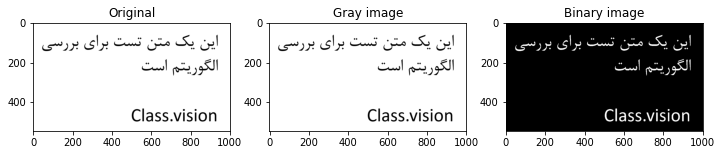

In [5]:
input_img=cv2.imread('images/Text.png')
#Gray image
gray_img=cv2.cvtColor(input_img,cv2.COLOR_BGR2GRAY)
#Binary image
_,binary_img=cv2.threshold(gray_img,127,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize=[12,8])
plt.subplot(131);plt.imshow(input_img, cmap='gray');plt.title("Original");

plt.subplot(132);plt.imshow(gray_img, cmap='gray');plt.title("Gray image");
plt.subplot(133);plt.imshow(binary_img, cmap='gray');plt.title("Binary image");

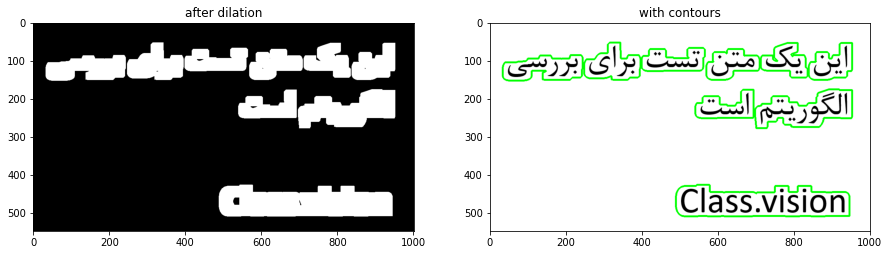

In [6]:
#Dilation
kernel=cv2.getStructuringElement(cv2.MORPH_RECT,(15,10))
dilation=cv2.dilate(binary_img,kernel,iterations=2)
outputImage=input_img.copy()
contours,hierachy=cv2.findContours(dilation,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
all_contours = cv2.drawContours(input_img, contours, -1, (0,255,0), 3)

plt.figure(figsize=[15,8])
plt.subplot(121);plt.imshow(dilation, cmap='gray');plt.title("after dilation");
plt.subplot(122);plt.imshow(all_contours, cmap='gray');plt.title("with contours");

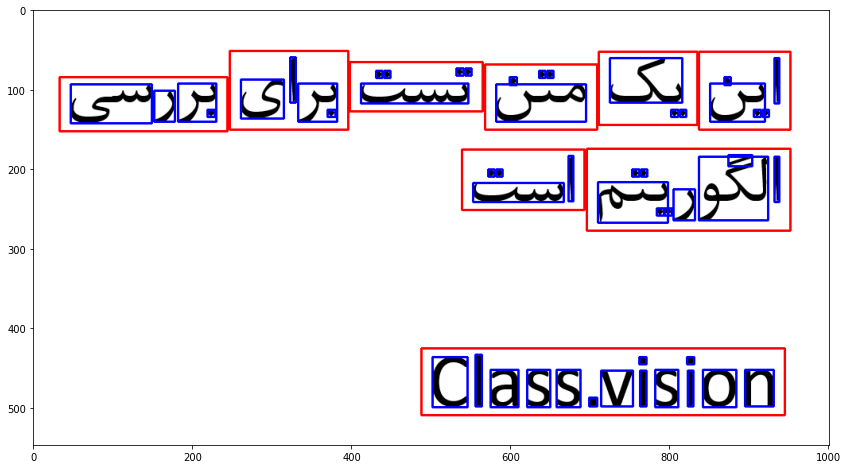

In [9]:
MIN_CONTOUR_AREA = 5


for contour in contours:                         
    if cv2.contourArea(contour) > MIN_CONTOUR_AREA:          

        [intX, intY, intW, intH] = cv2.boundingRect(contour)         

        cv2.rectangle(outputImage,(intX, intY), (intX+intW,intY+intH), (0, 0, 255), 2)                            

        # Get subimage of word and find contours of that word
        imgROI = binary_img[intY:intY+intH, intX:intX+intW]   


        subContours, subHierarchy = cv2.findContours(imgROI.copy(),        
                                             cv2.RETR_EXTERNAL,                 
                                             cv2.CHAIN_APPROX_SIMPLE) 

        # This part is not working as I am expecting
        for subContour in subContours:

            [pointX, pointY, width, height] = cv2.boundingRect(subContour) 


            cv2.rectangle(outputImage,(intX+pointX, intY+pointY),(intX+pointX+width, intY+pointY+height), (255, 0, 0),2)

plt.figure(figsize=[15,8])
plt.imshow(outputImage[...,::-1])